In [2]:
from my_weapon import *
from tqdm import tqdm_notebook as tqdm
from fake_identify import Are_you_IRA
import matplotlib
from collections import Counter
matplotlib.rcParams["font.size"] = 14
sns.set_style("darkgrid")
ira_c = sns.color_palette("coolwarm", 8)[7]
all_c = sns.color_palette("coolwarm", 8)[0]

Putin = Are_you_IRA()

## retweet reply and mention 交互

In [452]:
def num_of_interaction(G):
    """
    交互频率
    """
    print(G.number_of_nodes(), G.number_of_edges())
    freq_ira_as_n1 = []
    freq_ira_as_n2 = []
    freq_ira_toge = []

    for e in tqdm(G.edges(data=True)):
        if Putin.fuck(e[0]) and Putin.fuck(e[1]):
            freq_ira_toge.append(e[2]["weight"])
        if Putin.fuck(e[0]) and not Putin.fuck(e[1]):
            freq_ira_as_n1.append(e[2]["weight"])
        if Putin.fuck(e[1]) and not Putin.fuck(e[0]):
            freq_ira_as_n2.append(e[2]["weight"])

    freq_ira_as_n1 = pd.Series(freq_ira_as_n1)
    freq_ira_as_n2 = pd.Series(freq_ira_as_n2)
    freq_ira_toge = pd.Series(freq_ira_toge)
    
    print(freq_ira_as_n1.describe())
#     freq_ira_as_n1.hist()
#     plt.show()
#     plt.close()
    print(freq_ira_as_n2.describe())
#     freq_ira_as_n2.hist()
#     plt.show()
#     plt.close()
#     print(freq_ira_toge.describe())
    
    return freq_ira_as_n1, freq_ira_as_n2

In [11]:
from fake_identify import Are_you_IRA

putin = Are_you_IRA()


def get_G_char(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    
    n_nodes = G.number_of_nodes()
    n_edges = G.number_of_edges()
    k = G.number_of_edges() / G.number_of_nodes()

    out_d = pd.Series([k[1] for k in G.out_degree()])
    # print(out_d)
    ave_out_d = out_d.mean()
    std_out_d = out_d.std() / k
    max_out_d = out_d.max()

    in_d = pd.Series([k[1] for k in G.in_degree()])
    # print(in_d)
    ave_in_d = in_d.mean()
    std_in_d = in_d.std() / k
    max_in_d = in_d.max()

    return {
        "N nodes": n_nodes,
        "N edges": n_edges,
        "<k>": k,
        "std(k_out) / <k>": std_out_d,
        "std(k_in) / <k>": std_in_d,
        "max(k_out)": max_out_d,
        "max(k_in)": max_in_d,
    }        


def get_G_char_IRA(g_file):
    print(g_file, "...")
    G = nx.read_gpickle(g_file)
    
    nodes = [uid for uid in putin.IRA_user_set if G.has_node(uid)]
    
    n_nodes = len(nodes)
    out_d = pd.Series([G.out_degree(n) for n in nodes])
    ave_k_out = out_d.sum() / n_nodes
    std_k_out = out_d.std() / ave_k_out
    max_out_d = out_d.max()

    in_d = pd.Series([G.in_degree(n) for n in nodes])
    ave_k_in = in_d.sum() / n_nodes
    std_k_in = in_d.std() / ave_k_in
    max_in_d = in_d.max()
    
    return {
        "N nodes": n_nodes,
        "<k_out>": ave_k_out,
        "<k_in>": ave_k_in,
        "std(k_out) / <k_out>": std_k_out,
        "std(k_in) / <k_in>": std_k_in,
        "max(k_out)": max_out_d,
        "max(k_in)": max_in_d,
    }


In [13]:
all_rst = {}
all_rst["retweeting"] = get_G_char("disk/ira-ret.gp")
all_rst["mentioning"] = get_G_char("disk/ira-men.gp")
all_rst["replying"] = get_G_char("disk/ira-rep.gp")
all_rst["quoting"] = get_G_char("disk/ira-quo.gp")
# all_rst["interactionng (aggregated)"] = get_G_char("data/ira-interaction.gp")

networks_char = pd.DataFrame(all_rst).transpose()
networks_char = networks_char[["N nodes", "N edges", "<k>", "std(k_out) / <k>", "std(k_in) / <k>", "max(k_out)", "max(k_in)"]]

networks_char.to_csv("data/table_all_inter.csv", float_format="%.1f")
networks_char

disk/ira-ret.gp ...
disk/ira-men.gp ...
disk/ira-rep.gp ...
disk/ira-quo.gp ...


,N nodes,N edges,<k>,std(k_out) / <k>,std(k_in) / <k>,max(k_out),max(k_in)
retweeting,154366.0,360265.0,2.333836,101.515416,13.832627,74754.0,6238.0
mentioning,70926.0,197644.0,2.786623,22.314064,12.883068,8371.0,8879.0
replying,14225.0,16775.0,1.179262,47.190944,6.514765,6076.0,660.0
quoting,19195.0,31538.0,1.643032,25.141455,12.666609,4879.0,1716.0


In [14]:
ira_rst = {}
ira_rst["retweeting"] = get_G_char_IRA("disk/ira-ret.gp")
ira_rst["mentioning"] = get_G_char_IRA("disk/ira-men.gp")
ira_rst["replying"] = get_G_char_IRA("disk/ira-rep.gp")
ira_rst["quoting"] = get_G_char_IRA("disk/ira-quo.gp")
# ira_rst["interactionng (aggregated)"] = get_G_char_IRA("data/ira-interaction.gp")

networks_char = pd.DataFrame(ira_rst).transpose()
networks_char = networks_char[["N nodes", "<k_out>", "<k_in>", "std(k_out) / <k_out>", \
                               "std(k_in) / <k_in>", "max(k_out)", "max(k_in)"]]
networks_char

networks_char.to_csv("data/table_IRA_inter.csv", float_format="%.1f")
networks_char

disk/ira-ret.gp ...
disk/ira-men.gp ...
disk/ira-rep.gp ...
disk/ira-quo.gp ...


,N nodes,<k_out>,<k_in>,std(k_out) / <k_out>,std(k_in) / <k_in>,max(k_out),max(k_in)
retweeting,497.0,468.436620,261.961771,8.865644,1.930338,74754.0,6238.0
mentioning,508.0,353.080709,41.724409,1.828928,10.008341,8371.0,8879.0
replying,193.0,71.191710,16.430052,6.654323,3.899116,6076.0,660.0
quoting,353.0,36.390935,53.614731,8.313209,2.691440,4879.0,1716.0


In [456]:
%matplotlib inline

def get_cdf_pdf(data, mini=0, maxi=0, step=0, norm=True):
    if maxi == 0:
        maxi = data.max()
        print("max(x):", maxi)
    if step == 0:
        step = int((maxi - mini) / 100)
        if step == 0:
            step = 1
    x = np.arange(mini, maxi, step, dtype=np.float32)
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

In [14]:
G = nx.read_gpickle("disk/ira-ret.gp")
freq_ira_as_n1, freq_ira_as_n2 = num_of_interaction(G)

154366 360265



count    230070.000000
mean          2.464763
std           4.491968
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         202.000000
dtype: float64
count    127452.000000
mean          1.867134
std           4.127021
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         379.000000
dtype: float64


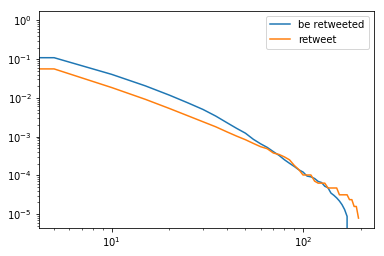

In [15]:
# plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(freq_ira_as_n1, 0, 200, 5)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='be retweeted')

x, cdf, pdf = get_cdf_pdf(freq_ira_as_n2, 0, 200, 5)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='retweet')
plt.legend()

In [16]:
G = nx.read_gpickle("disk/ira-rep.gp")
freq_ira_as_n1, freq_ira_as_n2 = num_of_interaction(G)

14225 16775



count    13604.000000
mean         1.179065
std          0.659684
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
dtype: float64
count    3035.000000
mean        1.616474
std         4.337203
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       164.000000
dtype: float64


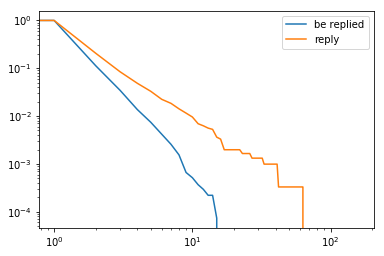

In [23]:
# plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(freq_ira_as_n1, 0, 160, 1)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='be replied')

x, cdf, pdf = get_cdf_pdf(freq_ira_as_n2, 0, 100, 1)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='reply')
plt.legend()

In [24]:
G = nx.read_gpickle("disk/ira-men.gp")
freq_ira_as_n1, freq_ira_as_n2 = num_of_interaction(G)

70926 197644



count    176448.000000
mean          1.835260
std           5.206205
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         782.000000
dtype: float64
count    18279.000000
mean         1.391980
std          1.507222
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        107.000000
dtype: float64


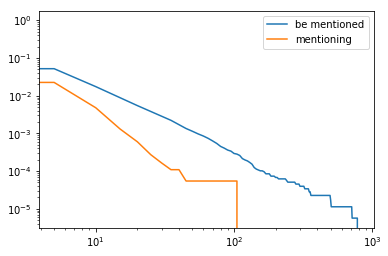

In [26]:
# plt.figure(figsize=(8, 6))
x, cdf, pdf = get_cdf_pdf(freq_ira_as_n1, 0, 800, 5)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='be mentioned')

x, cdf, pdf = get_cdf_pdf(freq_ira_as_n2, 0, 200, 5)
plt.xscale('log'); plt.yscale('log')
plt.plot(x, cdf, label='mentioning')
plt.legend()

## 用户与ira的交互表

In [457]:
from collections import defaultdict
users = {}

def _init(_n):
    if _n not in users:
        users[_n] = {"user_id": _n,
                     "in_rep": 0, "out_rep": 0,
                     "in_men": 0, "out_men": 0,
                     "in_ret": 0, "out_ret": 0,
                     "in_quo": 0, "out_quo": 0,}

G = nx.read_gpickle("disk/ira-ret.gp")
for e in G.edges(data=True):
    _init(e[0]) 
    _init(e[1])  
    if Putin.fuck(e[1]):   
        users[e[0]]["out_ret"] += e[2]["weight"]
    if Putin.fuck(e[0]):
        users[e[1]]["in_ret"] += e[2]["weight"]

G = nx.read_gpickle("disk/ira-rep.gp")
for e in G.edges(data=True):
    _init(e[0]) 
    _init(e[1])  
    
    if Putin.fuck(e[1]):
        users[e[0]]["out_rep"] += e[2]["weight"]
    if Putin.fuck(e[0]):
        users[e[1]]["in_rep"] += e[2]["weight"]
    
G = nx.read_gpickle("disk/ira-men.gp")
for e in G.edges(data=True):
    _init(e[0]) 
    _init(e[1])
    
    if Putin.fuck(e[1]):
        users[e[0]]["out_men"] += e[2]["weight"]
    if Putin.fuck(e[0]):
        users[e[1]]["in_men"] += e[2]["weight"]

G = nx.read_gpickle("disk/ira-quo.gp")
for e in G.edges(data=True):
    _init(e[0]) 
    _init(e[1])  
    
    if Putin.fuck(e[1]):
        users[e[0]]["out_quo"] += e[2]["weight"]
    if Putin.fuck(e[0]):
        users[e[1]]["in_quo"] += e[2]["weight"]
    
    
# 剔除IRA
for uid in list(Putin.IRA_user_set):
    try:
        del users[uid]
    except:
        pass
    
users = pd.DataFrame(users).transpose()
# users

max(x): 444
max(x): 2766


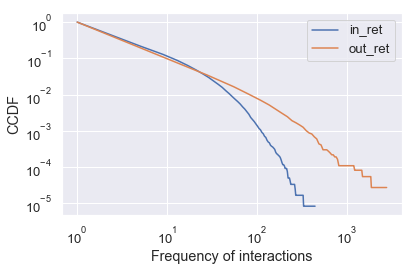

max(x): 5064
max(x): 107


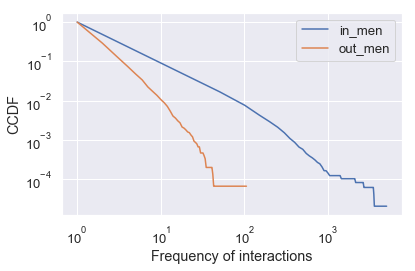

max(x): 29
max(x): 274


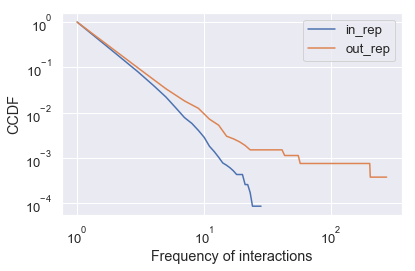

max(x): 49
max(x): 1113


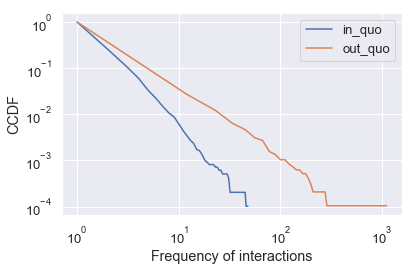

In [64]:
sns.set(style="darkgrid", font_scale=1.2)

for beh in ["ret", "men", "rep", "quo"]:
    
    plt.figure(figsize=(6, 4))
    # ax = plt.subplot(121)
    freq = pd.Series([v for v in users["in_" + beh] if v > 0])
    # print(freq.describe())
    x, cdf, pdf = get_cdf_pdf(freq, 1)
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(x, cdf, label="in_" + beh)

    # ax = plt.subplot(122)
    freq = pd.Series([v for v in users["out_" + beh] if v > 0])
    # print(freq.describe())
    x, cdf, pdf = get_cdf_pdf(freq, 1)
    plt.yscale('log')
    plt.xscale('log')
    plt.ylabel("CCDF")
    plt.xlabel("Frequency of interactions")
    plt.plot(x, cdf, label="out_" + beh)
    plt.legend()
    plt.tight_layout()
    plt.savefig("fig/Frequency of interactions {}.pdf".format(beh), dpi=300)
    plt.show(); plt.close()

## IRA的目标人群或是和IRA产生频繁交互的用户

发现：大量支持trump的用户主动与IRA互动

In [471]:
# users.to_csv("data/users_with_ira.csv", index=None)
users = pd.read_csv("data/users_with_ira.csv", dtype=str)
users = users.astype({"in_ret": int, "out_ret": int, "in_men": int, "out_men": int,
                      "in_rep": int, "out_rep": int, "in_quo": int, "out_quo": int})

In [472]:
user_strump = {}
user_strump2 = {}

for line in tqdm(open("disk/user_support.txt")):
    w = line.strip().split(",")
    _sum = int(w[2])
    _proT = _sum - int(w[1]) + 1
    _proH = int(w[1]) + 1
    user_strump[w[0]] = np.log(_proT / _proH)
    # user_strump2[w[0]] = 1 - float(w[3]) / int(w[2])

In [473]:
users = users.sort_values("in_ret", ascending=False)
print(len(users))
pro_trump = []
is_pro_trump = []
for _, row in tqdm(users.iterrows()):
    try:
        pro_trump.append(user_strump[row.user_id])
        if float(user_strump[row.user_id]) >= 0:
            is_pro_trump.append(1)
        else:
            is_pro_trump.append(0)
        # print(user_strump[str(row.user_id)])
        
    except Exception as e:
        # print(e)
        pro_trump.append(None)
        is_pro_trump.append(None)

print("Before dropna", len(users))        
users["supp_trump"] = pro_trump
users["is_trump"] = is_pro_trump
users = users.dropna() # 不能识别支持
print("After dropna", len(users))

168664


Before dropna 168664
After dropna 168664


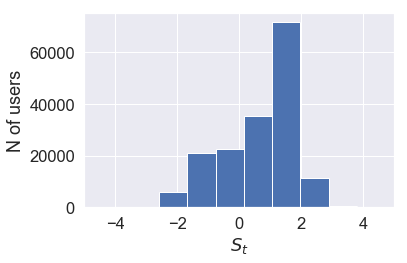

In [489]:
# sns.set("darkgrid", font_scale=1.2)

pro_trump = pd.Series(pro_trump)
plt.ylabel("N of users")
plt.xlabel("$S_{t}$")
pro_trump.hist(bins=15)
plt.xlim((-5, 5))
plt.tight_layout()
plt.savefig("fig/support_trump.pdf", dpi=300)
plt.show()

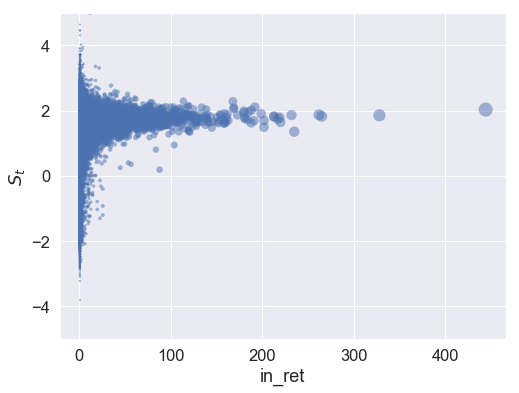

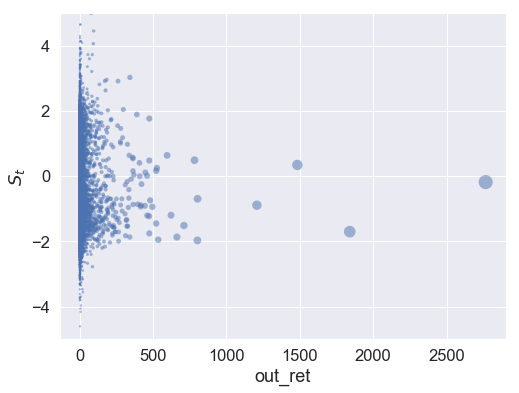

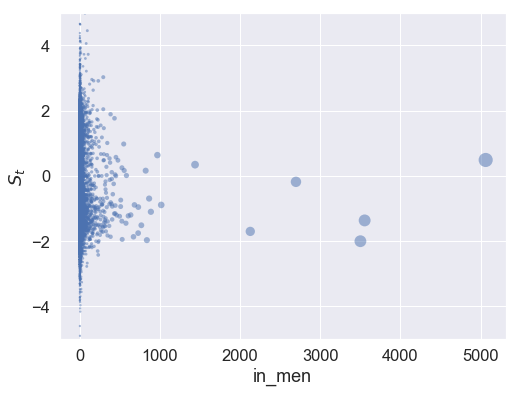

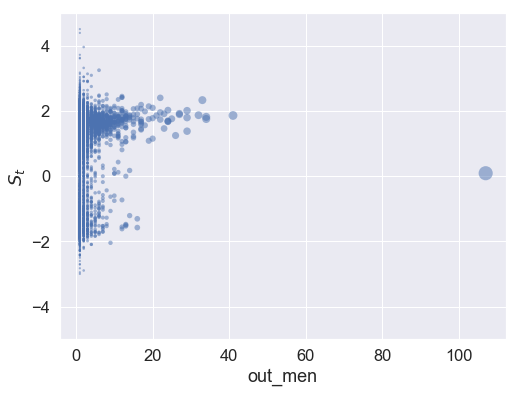

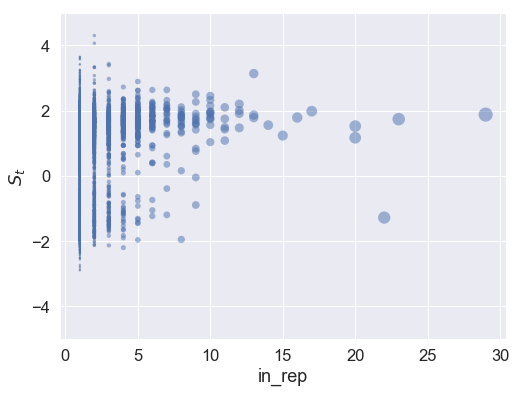

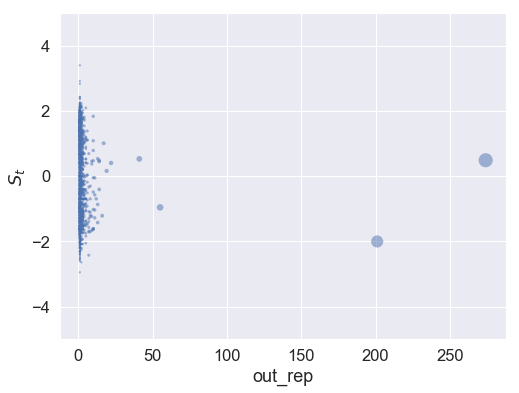

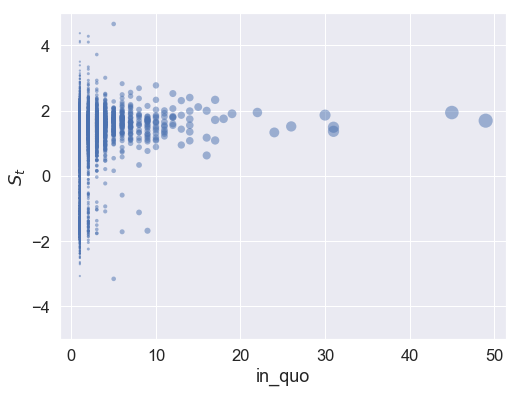

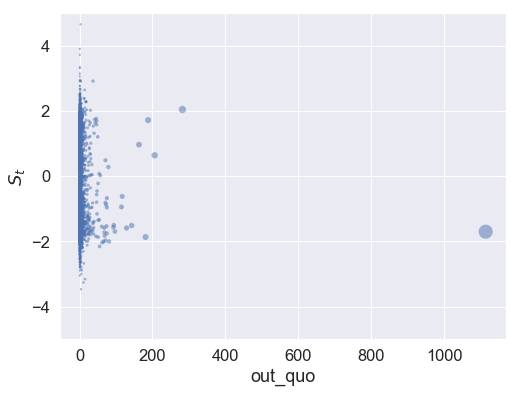

In [482]:
sns.set(style="darkgrid", font_scale=1.5)

for beh in ["in_ret", "out_ret", "in_men", "out_men", "in_rep", "out_rep", "in_quo", "out_quo"]:
    plt.figure(figsize=(8, 6))
    tmp = users[users[beh] > 0]
    sns.scatterplot(x=beh, y="supp_trump", size=beh, data=tmp, 
                    alpha=0.5, sizes=(5, 200), edgecolor="none", legend=False)
    plt.ylim((-5, 5))
    plt.ylabel("$S_{t}$")
#     plt.legend(frameon=False)
    plt.savefig("fig/St_{}.png".format(beh), dpi=300)
    plt.show(); plt.close()

In [13]:
users.corr()

,in_men,in_quo,in_rep,in_ret,out_men,out_quo,out_rep,out_ret,supp_trump,is_trump
in_men,1.000000,-0.001275,-0.007508,-0.014822,0.006293,0.356267,0.639711,0.717177,-0.062426,-0.062182
in_quo,-0.001275,1.000000,0.078444,0.151186,0.109610,0.022548,0.002958,0.002098,0.068297,0.065565
in_rep,-0.007508,0.078444,1.000000,0.146647,0.214002,-0.003983,0.013701,-0.008970,0.031677,0.020969
in_ret,-0.014822,0.151186,0.146647,1.000000,0.324219,-0.002150,-0.002958,-0.016136,0.232825,0.201204
out_men,0.006293,0.109610,0.214002,0.324219,1.000000,0.004442,0.002310,0.011607,0.066727,0.054664
out_quo,0.356267,0.022548,-0.003983,-0.002150,0.004442,1.000000,0.082033,0.449663,-0.036731,-0.036901
out_rep,0.639711,0.002958,0.013701,-0.002958,0.002310,0.082033,1.000000,0.150058,-0.018101,-0.016367
out_ret,0.717177,0.002098,-0.008970,-0.016136,0.011607,0.449663,0.150058,1.000000,-0.073174,-0.073936
supp_trump,-0.062426,0.068297,0.031677,0.232825,0.066727,-0.036731,-0.018101,-0.073174,1.000000,0.899009
is_trump,-0.062182,0.065565,0.020969,0.201204,0.054664,-0.036901,-0.016367,-0.073936,0.899009,1.000000


In [ ]:
%matplotlib inline

def get_group(data, y, mini=0, maxi=0, step=0):
    if maxi == 0:
        maxi = data.max()
#         print("max(x):", maxi)
    if step == 0:
        step = int((maxi - mini) / 5)
        if step == 0:
            step = 1
        
    print(mini, maxi, step)
    x = np.arange(mini, maxi, step, dtype=int)
#     print(x)
    pdf = [[] for _ in range(len(x))] 
    for d, y_i in zip(data, y):

        if d < mini or d > maxi:
            continue

        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i].append(y_i)
            elif d >= x[i] and d < x[i+1]:
                pdf[i].append(y_i)
    
    pdf = [pd.Series(pdf[i]).mean() for i in range(len(x))]
    
    return x, pdf

In [118]:
for beh in ["in_ret", "out_ret", "in_men", "out_men", "in_rep", "out_rep", "in_quo", "out_quo"]:
#     plt.figure(figsize=(8, 6))
    tmp = users[users[beh] > 0]
    x, y = get_group(tmp[beh], tmp["is_trump"])
#     plt.plot(x, y)
#     sns.scatterplot(x=beh, y="is_trump", size=beh, data=tmp, alpha=0.5, sizes=(5, 200), edgecolor="none", legend=False)
#     plt.ylabel("$S_{t}$")
#     plt.legend(frameon=False)
#     plt.savefig("fig/St and {}.pdf".format(beh), dpi=100)
#     plt.show(); plt.close()

0 444 88
0 2766 553
0 5064 1012
0 107 21
0 29 5
0 274 54
0 49 9
0 1113 222


## IRA主动交互的是谁呢？

补充name及粉丝数等信息

In [136]:
user_data = {}

for line in tqdm(open("disk/user_info.json")):
    w = line.strip().split(",")
    if int(w[2]) >= 1 and int(w[3]) >= 1:
        user_data[w[0]] = {
            "user_id": w[0],
            "name": w[1],
            "fol": int(w[2]),
            "fri": int(w[3]),
        }

In [147]:
name = []
fol = []
fri = []

print("Before dropna", len(users))
for _, row in tqdm(users.iterrows()):
    try:
        name.append(user_data[row.user_id]["name"])
        fol.append(user_data[row.user_id]["fol"])
        fri.append(user_data[row.user_id]["fri"])
    except Exception as e:
        name.append(None)
        fol.append(None)
        fri.append(None)

users["name"] = name
users["follower_count"] = fol
users["following_count"] = fri
users = users.dropna() # 不能识别支持
print("After dropna", len(users))

Before dropna 167912


/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


After dropna 167912


/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [148]:
users.head()

,in_men,in_quo,in_rep,in_ret,out_men,out_quo,out_rep,out_ret,user_id,supp_trump,is_trump,name,follower_count,following_count
0,0,0,0,444,2,0,0,0,884311340,0.884479,1,bfrasier1951,1501,1202
1,0,0,0,328,0,0,0,0,420502656,0.865308,1,lawdawgseven,635,495
2,0,0,0,265,4,0,0,0,4886213447,0.861500,1,Paolalopez1971,1759,851
3,0,0,0,262,4,0,0,0,154228382,0.867193,1,glassyelegance,846,120
4,0,0,2,235,0,0,0,0,718978155327803392,0.795791,1,Mutt1961,47,16


In [152]:
# for beh in ["in_ret", "out_ret", "in_men", "out_men", "in_rep", "out_rep", "in_quo", "out_quo"]:
for beh in ["out_ret", "in_men", "out_rep", "out_quo"]:
    sort_people = users.sort_values(beh, ascending=False)[:20]
    sort_people = sort_people[["name", beh, "follower_count", "following_count"]]
    display(sort_people)
#     sort_people.to_csv("users_rank_by_{}.csv".format(beh), index=None)

,name,out_ret,follower_count,following_count
159678,blicqer,2766,83897,71257
159069,TalibKweli,1840,1099112,5009
157736,RT_com,1483,2445241,593
159544,thehill,1207,1564409,647
158818,rapstationradio,803,5425,830
160147,thetrudz,802,52687,1137
159534,realDonaldTrump,782,16444691,46
159658,FeministaJones,710,111396,2305
159562,chiefplan1,662,3293,5009
159584,guardian,622,6075611,1115


,name,in_men,follower_count,following_count
159534,realDonaldTrump,5064,16444691,46
159828,midnight,3554,561805,1436
159448,HillaryClinton,3501,11435589,760
159678,blicqer,2697,83897,71257
159069,TalibKweli,2127,1099112,5009
157736,RT_com,1438,2445241,593
159544,thehill,1016,1564409,647
159548,josephjett,968,113310,21939
121949,YouTube,887,64567728,961
158818,rapstationradio,865,5425,830


,name,out_rep,follower_count,following_count
159534,realDonaldTrump,274,16444691,46
159448,HillaryClinton,201,11435589,760
158934,CNN,55,29893365,1122
29727,TrumpNation22,41,1732,2021
121313,Yng_God,22,782,1139
159475,FoxNews,19,11971264,431
12846,JaredWyand,17,132808,9964
154760,robbstarklivesx,16,1639,1907
120792,MurphybeGood,14,70,100
159550,DRUDGE_REPORT,14,1091537,2


,name,out_quo,follower_count,following_count
159069,TalibKweli,1113,1099112,5009
158992,AbnInfVet,282,31644,31704
40516,cmdorsey,206,11955,13003
15151,abusedtaxpayer,188,7375,7316
159732,JoyAnnReid,181,386636,3657
37670,ihatethemedia,163,8938,1240
159658,FeministaJones,143,111396,2305
160222,djolder,129,30648,6322
158180,KingJohnLove,117,4128,998
158031,cutupx2,115,12070,7420


## 针对四个网络做community detection

In [22]:
from infomap import Infomap

def findCommunities(G, mt=1):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id and return number of communities found.
    """
    infomapWrapper = Infomap(f"--two-level --silent --markov-time {mt} -N 10")

#     print("Building Infomap network from a NetworkX graph...")
    
    for e in G.edges(data=True):
        e = (G.node[e[0]]["id"], G.node[e[1]]["id"])
#         e = (G.node[e[0]]["id"], G.node[e[1]]["id"])
        # print(e)
        infomapWrapper.addLink(*e)

#     print("Find communities with Infomap...")
    infomapWrapper.run();

#     print("Found %d modules with codelength: %f" % (infomapWrapper.numTopModules(), infomapWrapper.codelength()))
    
    communities = {}
#     for node in infomapWrapper.iterTree():
#         print("{} {}".format(node.path(), node.physicalId))

    ix_to_name = {G.node[name]["id"]: name for name in G.nodes()}
    # print(ix_to_name)

    for node in infomapWrapper.iterTree():
        if node.isLeaf():
            # f.write("{}\t{}\t{}\n".format(ix_to_name[node.physicalId], node.physicalId, node.moduleIndex()))
            communities[ix_to_name[node.physicalId]] = node.moduleIndex()
    
    nx.set_node_attributes(G, name='community_Infomap', values=communities)

    return G, communities, infomapWrapper.numTopModules(), infomapWrapper.codelength()

In [336]:
G = nx.read_gpickle("disk/ira-ret.gp")
# G

In [337]:
G.number_of_nodes(), G.number_of_edges()

(154366, 360265)

In [338]:
G = G.subgraph(max(nx.weakly_connected_components(G), key=len))

In [339]:
putin = Are_you_IRA()

for i, n in enumerate(G.nodes()):
    if putin.fuck(n):
        G.node[n]["IRA"] = 1
    else:
        G.node[n]["IRA"] = 0

In [340]:
G = G.to_undirected()

In [341]:
# cnt = 0

# for matlab
with open("data/ira-ret.net", "w") as f:
    f.write(f"*Vertices {G.number_of_nodes()}\n")
    for i, n in enumerate(G.nodes()):
        G.node[n]["id"] = i + 1
        f.write(f'{i+1} "{i+1}"\n')
    f.write("*Edges\n")
    
    for e in G.edges(data=True):
#         print(e)
        n1, n2 = e[0], e[1]
        f.write(f"{G.node[n1]['id']} {G.node[n2]['id']} 1\n")
    #     print(G.node[n])
                
G.number_of_nodes(), G.number_of_edges()

(154257, 359244)

In [274]:
G, comm, num, cl = findCommunities(G, mt=5)

from collections import Counter
cnt = Counter()
for k, v in comm.items():
    cnt[v] += 1
print(cnt.most_common(10))

json.dump(comm, open("data/ira-ret-community.json", "w"), indent=2)

# ira_rst["mentioning"] = get_G_char_IRA("disk/ira-men.gp")
# ira_rst["replying"] = get_G_char_IRA("disk/ira-rep.gp")
# ira_rst["quoting"] = get_G_char_IRA("disk/ira-quo.gp")

[(0, 120724), (2, 22731), (1, 7947), (6, 552), (22, 262), (20, 209), (7, 179), (4, 142), (13, 127), (129, 118)]


In [10]:
from collections import Counter
rst = []

for i in tqdm(np.arange(1, 11, 1)):
#     print(f"\n***** --markov-time ={i} *****")
    G, comm, n_mod, codelength = findCommunities(G, mt=i)
    cnt = Counter()
    for k, v in comm.items():
        cnt[v] += 1
    print("Size of top 10 communities:", [s for n, s in cnt.most_common(10)])
    rst.append([i, n_mod, codelength, cnt.most_common(10)])

Size of top 10 communities: [34097, 15849, 15446, 7733, 6776, 5321, 5286, 4753, 4659, 4393]
Size of top 10 communities: [133167, 7784, 6613, 1473, 1125, 823, 479, 358, 242, 173]
Size of top 10 communities: [143984, 6641, 1133, 484, 281, 169, 137, 136, 118, 117]
Size of top 10 communities: [144179, 7791, 617, 370, 169, 154, 138, 118, 101, 85]
Size of top 10 communities: [145117, 7823, 169, 169, 167, 159, 118, 117, 85, 83]
Size of top 10 communities: [153562, 169, 118, 85, 81, 42, 41, 37, 26, 21]
Size of top 10 communities: [153664, 254, 118, 42, 41, 37, 26, 20, 18, 10]
Size of top 10 communities: [153637, 169, 118, 85, 75, 42, 41, 37, 20, 12]
Size of top 10 communities: [153687, 256, 118, 73, 38, 37, 20, 12, 9, 7]
Size of top 10 communities: [153795, 258, 118, 38, 20, 12, 9, 7]


In [290]:
X = [r[0] for r in rst]
sns.set(style="white", font_scale=1.4)

Text(0, 0.5, 'Number of modules')

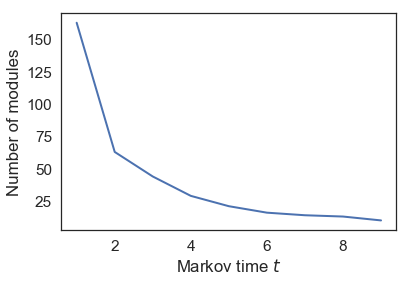

In [291]:
y = [r[1] for r in rst]
# print(y)
plt.plot(X, y, lw=2)
plt.xlabel("Markov time $t$")
plt.ylabel("Number of modules")
# plt.xscale("log")

Text(0, 0.5, 'Code length (bits)')

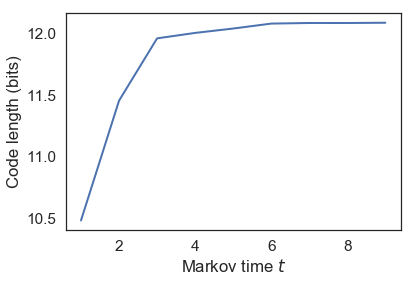

In [292]:
y = [r[2] for r in rst]
# print(y)
plt.plot(X, y, lw=2)
plt.xlabel("Markov time $t$")
plt.ylabel("Code length (bits)")
# plt.xscale("log")

Text(0, 0.5, 'Size of the largest module')

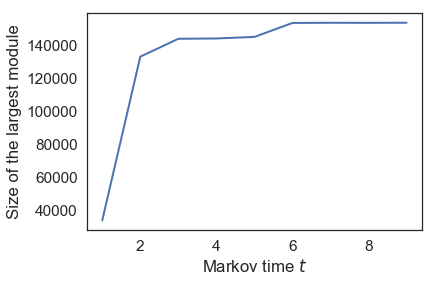

In [293]:
y = [r[3][0][1] for r in rst]
# print(y)
plt.plot(X, y, lw=2)
plt.xlabel("Markov time $t$")
plt.ylabel("Size of the largest module")
# plt.xscale("log")

In [294]:
import community

G = nx.Graph(G)
partition = community.best_partition(G)
# partition = community.best_partition(G, resolution=5)

In [295]:
cnt = Counter()
for n, c in partition.items():
    cnt[c] += 1 

In [296]:
cnt.most_common()

[(1, 49455),
 (5, 18030),
 (0, 16434),
 (9, 15082),
 (3, 13973),
 (7, 12572),
 (6, 8441),
 (4, 7774),
 (8, 7741),
 (2, 2718),
 (10, 1118),
 (13, 358),
 (14, 297),
 (17, 118),
 (15, 76),
 (11, 26),
 (16, 20),
 (18, 12),
 (12, 6),
 (19, 6)]

In [96]:
comm_nodes = {}

for n in G.nodes(data=True):
    c =  n[1]["community_Infomap"]
    if c not in comm_nodes:
        comm_nodes[c] = 0
    if n[1]["IRA"] == 1:
        comm_nodes[c] += 1

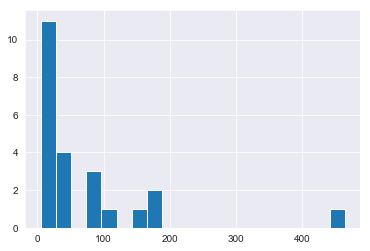

In [97]:
# 社团大小

d = pd.Series([v for v in cnt.values() if v < 1000])
# x, cdf, pdf = get_cdf_pdf(d, mini=1)
# plt.plot(x, pdf)
# plt.xscale("log")
d.hist(bins=20)

In [67]:
# for gephi

plot_these_nodes = []
keep_iras = []


for n in G.node(data=True):
#     if n[1]["community_Infomap"] in [0, 3, 23, 8, 6]:
#     if n[1]["community_Infomap"] in [0, 9, 2, 3, 4]:
    if n[1]["community_Infomap"] in [0, 1, 2]:
        if n[1]["IRA"] == 1:
            keep_iras.append(n[0])
        else:
            plot_these_nodes.append(n[0])
            
len(plot_these_nodes), len(keep_iras)

(151270, 287)

In [190]:
# random sampling for show
import random

plot_these_nodes = random.sample(plot_these_nodes, int(len(plot_these_nodes) * 0.1))
plot_these_nodes.extend(keep_iras)
G = G.subgraph(plot_these_nodes)
G = G.subgraph(max(nx.connected_components(G), key=len))

In [169]:
G = nx.Graph(G)

In [170]:
nx.write_gexf(G, "data/IRA-20190506.gexf")

### IRA关注于哪些社团？

In [42]:
from collections import Counter

cnt = Counter()
for k, v in comm.items():
    if putin.fuck(k):
        cnt[v] += 1
    
cnt.most_common(100)

[(9, 107),
 (3, 80),
 (2, 56),
 (36, 46),
 (44, 28),
 (0, 27),
 (28, 21),
 (10, 8),
 (49, 8),
 (50, 6),
 (4, 5),
 (14, 4),
 (46, 4),
 (1, 3),
 (43, 3),
 (51, 3),
 (5, 2),
 (12, 2),
 (15, 2),
 (17, 2),
 (21, 2),
 (30, 2),
 (6, 1),
 (7, 1),
 (8, 1),
 (11, 1),
 (13, 1),
 (16, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (29, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (45, 1),
 (47, 1),
 (48, 1),
 (52, 1)]

In [75]:
cnt = Counter()
for k, v in comm.items():
    cnt[v] += 1
    
print(cnt.most_common(50))
    
cnt[3], cnt[23], cnt[81], cnt[95], cnt[0]

[(0, 100991), (3, 7691), (23, 6912), (8, 6553), (6, 5060), (2, 3399), (11, 2288), (19, 1934), (1, 1743), (26, 1256), (9, 1129), (60, 1068), (14, 1051), (29, 1034), (27, 925), (4, 837), (39, 831), (28, 761), (62, 673), (25, 628), (21, 557), (61, 530), (45, 486), (52, 479), (43, 364), (81, 285), (5, 270), (65, 249), (7, 231), (56, 225), (55, 222), (40, 220), (57, 208), (64, 175), (69, 169), (44, 144), (42, 137), (24, 134), (35, 134), (50, 122), (16, 120), (95, 118), (17, 117), (22, 116), (87, 88), (10, 85), (34, 76), (31, 73), (15, 71), (12, 68)]


(7691, 6912, 285, 118, 100991)

[(3, 79),
 (23, 64),
 (81, 43),
 (95, 28),
 (0, 18),
 (5, 18),
 (67, 17),
 (105, 8),
 (25, 7),
 (11, 6)]
 
 专注3，23，84，0 三个社团，看看他们是否有不同的受众？
 
 (7691, 6910, 281, 118)

In [76]:
for n in G.nodes():
    print(n, G.node[n])
    break

4437444442 {'id': 0, 'community_Infomap': 0}


## 判断time？何时才是最佳的社团？ 

构建交互网络

In [9]:
n1 = nx.read_gpickle("disk/ira-ret.gp")
n2 = nx.read_gpickle("disk/ira-men.gp")
n3 = nx.read_gpickle("disk/ira-rep.gp")
n4 = nx.read_gpickle("disk/ira-quo.gp")

In [10]:
G = nx.Graph()

G.add_edges_from(n1.edges)
G.add_edges_from(n2.edges)
G.add_edges_from(n3.edges)
G.add_edges_from(n4.edges)

G = G.to_undirected()
print(G.number_of_nodes(), G.number_of_edges())
G = G.subgraph(max(nx.connected_components(G), key=len))


putin = Are_you_IRA()

for i, n in enumerate(G.nodes()):
    if putin.fuck(n):
        G.node[n]["IRA"] = 1
    else:
        G.node[n]["IRA"] = 0

# for matlab
with open("data/ira-interaction.net", "w") as f:
    f.write(f"*Vertices {G.number_of_nodes()}\n")
    for i, n in enumerate(G.nodes()):
        G.node[n]["id"] = i + 1
        f.write(f'{i+1} "{i+1}"\n')
    f.write("*Edges\n")
    
    for e in G.edges(data=True):
#         print(e)
        n1, n2 = e[0], e[1]
        f.write(f"{G.node[n1]['id']} {G.node[n2]['id']} 1\n")
    #     print(G.node[n])

nx.write_gpickle(G, "data/ira-interaction.gp")
G.number_of_nodes(), G.number_of_edges()

179783 430704


(179682, 430626)

In [41]:
G = nx.read_gpickle("data/ira-interaction.gp")

In [37]:
d_vi = np.loadtxt("disk/comm-rst-interaction.txt")

In [38]:
d_vi.shape

(179686, 100)

In [39]:
time = d_vi[0]
S = d_vi[1]
N = d_vi[2]
VI = d_vi[3]

In [41]:
for i in range(d_vi.shape[1]):
    print(f"{i}\t{time[i]:.3f}\t{N[i]}\t{VI[i]}")

0	0.010	117832.0	0.025619626
1	0.011	113936.0	0.029415615
2	0.012	109802.0	0.026990716
3	0.013	105847.0	0.027135774
4	0.015	102917.0	0.026399801
5	0.016	99616.0	0.025201255
6	0.017	96591.0	0.023340018
7	0.019	94160.0	0.020709346
8	0.021	92869.0	0.021991238
9	0.023	91620.0	0.023271491
10	0.025	90216.0	0.024323622
11	0.028	88827.0	0.025120321
12	0.031	87383.0	0.02744031
13	0.034	85655.0	0.0287749
14	0.037	83811.0	0.029456751
15	0.040	81915.0	0.031470779
16	0.044	77094.0	0.044766053
17	0.049	71581.0	0.03832969
18	0.053	65656.0	0.054060226
19	0.059	59953.0	0.043599183
20	0.064	57263.0	0.031351059
21	0.071	56151.0	0.029932439
22	0.077	55142.0	0.027321304
23	0.085	53870.0	0.031190057
24	0.093	52141.0	0.033833877
25	0.102	43852.0	0.08174138
26	0.112	32410.0	0.12481511
27	0.123	20211.0	0.12314571
28	0.135	8009.0	0.067745814
29	0.148	2426.0	0.025411438
30	0.163	1928.0	0.024808814
31	0.179	1408.0	0.024516363
32	0.196	791.0	0.020827748
33	0.215	160.0	0.016311775
34	0.236	74.0	0.015485818
35	0.260

Text(0.5, 0, 'Markov time')

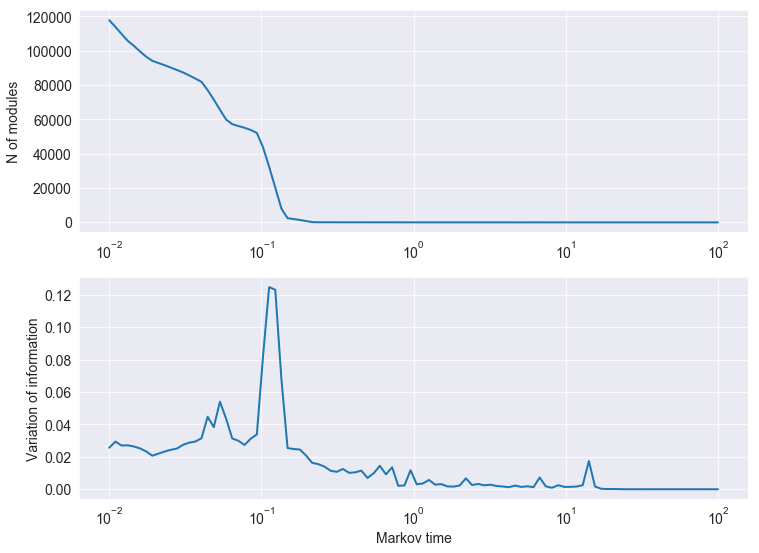

In [42]:
plt.figure(figsize=(12, 9))
# plt.subplot(3, 1, 1)
# plt.plot(time, S)
# plt.ylabel("Stability")
# plt.xscale("log")

plt.subplot(2, 1, 1)
plt.plot(time, N, lw=2)
plt.ylabel("N of modules")
plt.xscale("log")

plt.subplot(2, 1, 2)
plt.plot(time, VI, lw=2)
plt.ylabel("Variation of information")
plt.xscale("log")
plt.xlabel("Markov time")

In [45]:
# for i in range(len(time)):
#     print(i, time[i], VI[i])

time = d_vi[0, 35:76]
S = d_vi[1, 35:76]
N = d_vi[2, 35:76]
VI = d_vi[3, 35:76]

Text(0.5, 0, 'Markov time')

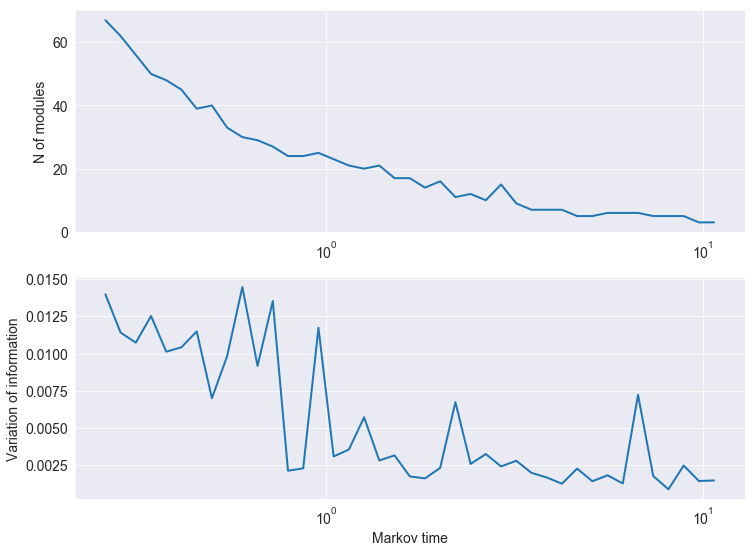

In [46]:
plt.figure(figsize=(12, 9))
# plt.subplot(3, 1, 1)
# plt.plot(time, S)
# plt.ylabel("Stability")
# plt.xscale("log")

plt.subplot(2, 1, 1)
plt.plot(time, N, lw=2)
plt.ylabel("N of modules")
plt.xscale("log")

plt.subplot(2, 1, 2)
plt.plot(time, VI, lw=2)
plt.ylabel("Variation of information")
plt.xscale("log")
plt.xlabel("Markov time")

In [47]:
# rst = d_vi[4:, 72]
rst = d_vi[4:, 47]

new_d = {}
for i, c in enumerate(rst):
    new_d[i+1] = int(c)

In [48]:
# 赋予所属社团

new_dd = {}
for n in G.node():
    G.node[n]["mod"] = new_d[G.node[n]["id"]]
    new_dd[n] = new_d[G.node[n]["id"]]
    
json.dump(new_dd, open("data/louvain_rst_24.json", "w"), indent=2)

In [50]:
comm_nodes = Counter()

for n in G.nodes(data=True):
    c =  n[1]["mod"]
    if n[1]["IRA"] == 1:
        comm_nodes[c] += 1
        
comm_nodes.most_common()

[(3, 116),
 (7, 114),
 (4, 80),
 (18, 35),
 (12, 32),
 (9, 27),
 (1, 26),
 (8, 18),
 (16, 14),
 (0, 9),
 (14, 7),
 (22, 3),
 (19, 3),
 (13, 2),
 (2, 2),
 (10, 1),
 (15, 1),
 (11, 1),
 (17, 1),
 (5, 1),
 (20, 1),
 (21, 1),
 (6, 1),
 (23, 1)]

In [51]:
comm_nodes = Counter()

for n in G.nodes(data=True):
    c =  n[1]["mod"]
    comm_nodes[c] += 1
        
comm_nodes.most_common()

[(22, 37882),
 (1, 27958),
 (7, 21373),
 (3, 21316),
 (10, 16738),
 (15, 16499),
 (8, 9838),
 (4, 9092),
 (2, 6696),
 (13, 5874),
 (0, 3491),
 (9, 1515),
 (16, 486),
 (14, 352),
 (12, 294),
 (18, 165),
 (6, 45),
 (11, 20),
 (21, 16),
 (23, 9),
 (17, 7),
 (20, 6),
 (5, 5),
 (19, 5)]

In [436]:
# for gephi

plot_these_nodes = []
keep_iras = []


for n in G.node(data=True):
#     if n[1]["mod"] in [7, 1, 11, 3, 2, 8, 6]:
#     if n[1]["mod"] in [1, 8, 14, 4, 0, 11, 3, 13, 7, 2]:
    if n[1]["mod"] in [0, 1, 4]:
        if n[1]["IRA"] == 1:
            keep_iras.append(n[0])
        else:
            plot_these_nodes.append(n[0])
            
len(plot_these_nodes), len(keep_iras)

(179018, 461)

In [437]:
# random sampling for show
import random

plot_these_nodes = random.sample(plot_these_nodes, int(len(plot_these_nodes) * 0.1))
plot_these_nodes.extend(keep_iras)
G = G.subgraph(plot_these_nodes)
G = G.subgraph(max(nx.connected_components(G), key=len))

In [438]:
G = nx.Graph(G)

In [439]:
nx.write_gexf(G, "data/IRA-20190517.gexf")

## The 2nd layer of interaction network

1. 取出每个社团传递的消息（两个节点都需要在某社团中）
2. 定义每个社团的话题和#hashtags
3. 找到更多传播的相关信息（相关话题和hashtags#）
4. 分析每个社团是如何传播消息的

In [2]:
putin = Are_you_IRA()
putin.uncover('19fcd9060d8817ac4a49574b5226e770abff10522d4a7579343e2a99696efa1a')

'19fcd9060d8817ac4a49574b5226e770abff10522d4a7579343e2a99696efa1a'

In [3]:
comm = json.load(open("data/louvain_rst_5.json"))
c = Counter()
for v in comm.values():
    c[v] += 1
c.most_common()

[(0, 137938), (1, 31955), (4, 9586), (3, 165), (2, 38)]

In [81]:
comm = json.load(open("data/louvain_rst_24.json"))
c = Counter()
for v in comm.values():
    c[v] += 1
c.most_common()

[(22, 37882),
 (1, 27958),
 (7, 21373),
 (3, 21316),
 (10, 16738),
 (15, 16499),
 (8, 9838),
 (4, 9092),
 (2, 6696),
 (13, 5874),
 (0, 3491),
 (9, 1515),
 (16, 486),
 (14, 352),
 (12, 294),
 (18, 165),
 (6, 45),
 (11, 20),
 (21, 16),
 (23, 9),
 (17, 7),
 (20, 6),
 (5, 5),
 (19, 5)]

In [82]:
# ira-ret-links.txt

with open("disk/ira-ret-info.txt", "w") as f:
    for line in tqdm(open("disk/ira-ret-links.txt")):
        w = line.strip().split()
        try:
            if comm[w[1]] == comm[w[2]]:
                f.write(f"{w[0]} {comm[w[1]]}\n")
        except:
            # print(w)
            pass
    head = True
    for line in tqdm(open("disk/ira-ret.txt")):
        if head:
            head = False
            continue
        w = line.strip().split(",")
        try:
            if comm[w[1]] == comm[w[3]]:
                f.write(f"{w[0]} {comm[w[1]]}\n")
        except:
            # print(w)
            pass

In [83]:
with open("disk/ira-quo-info.txt", "w") as f:
    for line in tqdm(open("disk/ira-quo-links.txt")):
        w = line.strip().split()
        try:
            if comm[w[1]] == comm[w[2]]:
                f.write(f"{w[0]} {comm[w[1]]}\n")
        except:
            # print(w)
            pass
    head = True
    for line in tqdm(open("disk/ira-quo.txt")):
        if head:
            head = False
            continue
        w = line.strip().split(",")
        try:
            if comm[w[1]] == comm[w[3]]:
                f.write(f"{w[0]} {comm[w[1]]}\n")
        except:
            # print(w)
            pass

In [84]:
with open("disk/ira-rep-info.txt", "w") as f:
    for line in tqdm(open("disk/ira-rep-links.txt")):
        w = line.strip().split()
        try:
            if comm[w[1]] == comm[w[2]]:
                f.write(f"{w[0]} {comm[w[1]]}\n")
        except:
            # print(w)
            pass
    head = True
    for line in tqdm(open("disk/ira-rep.txt")):
        if head:
            head = False
            continue
        w = line.strip().split(",")
        try:
            if comm[w[1]] == comm[w[3]]:
                f.write(f"{w[0]} {comm[w[1]]}\n")
        except:
            # print(w)
            pass

In [85]:
with open("disk/ira-men-info.txt", "w") as f:
    for line in tqdm(open("disk/ira-men-links.txt")):
        w = line.strip().split()
        try:
            if comm[w[1]] == comm[w[2]]:
                f.write(f"{w[0]} {comm[w[1]]}\n")
        except:
            # print(w)
            pass
    head = True
    for line in tqdm(open("disk/ira-men.txt")):
        if head:
            head = False
            continue
        w = line.strip().split(",")
        try:
            if comm[w[1]] == comm[w[2]]:
                f.write(f"{w[0]} {comm[w[1]]}\n")
        except:
            # print(w)
            pass

In [86]:
with open("disk/ira-int-info.txt", "w") as f:
    [f.write(line) for line in open("disk/ira-ret-info.txt")]
    [f.write(line) for line in open("disk/ira-men-info.txt")]
    [f.write(line) for line in open("disk/ira-rep-info.txt")]
    [f.write(line) for line in open("disk/ira-quo-info.txt")]

In [87]:
from SQLite_handler import find_tweets
from tqdm import tqdm_notebook as tqdm

In [88]:
set_id = set()

for line in open("disk/ira-int-info.txt"):
    tid = line.split()[0]
    if tid in set_id:
        continue
    set_id.add(tid)

In [89]:
set_id = list(set_id)

In [90]:
tweets_data = find_tweets(set_id)

100%|██████████| 446765/446765 [01:42<00:00, 4363.28it/s]


In [91]:
from pprint import pprint
pprint(tweets_data[0])

{'datetime_EST': '2016-07-07 10:35:25',
 'filename_id': 142,
 'p_pro_hillary_anti_trump': None,
 'place': None,
 'query_id': 0,
 'source_content_id': 2,
 'source_url_id': 2,
 'text': 'RT @jmzxng: Donald Trump is right about Hillary Clinton. \n'
         '\n'
         'Hillary Clinton is right about Donald Trump.\n'
         '\n'
         'Trump agrees w Bernie \n'
         '\n'
         'Clinton ag…',
 'tweet_id': 751077164632698882,
 'user_id': 1868496344}


In [92]:
"没有找到的：", len([t for t in tweets_data if 'error' in t])

('没有找到的：', 232485)

In [93]:
cannot_found = set([str(t["tweet_id"]) for t in tweets_data if 'error' in t])
have_found = set([str(t["tweet_id"]) for t in tweets_data if 'error' not in t])

In [94]:
_d = pd.read_csv("disk/ira_tweets_csv_hashed.csv", usecols=["tweetid", "tweet_text", "userid", "tweet_language", "tweet_time"], dtype=str)

In [95]:
_d = _d[_d.tweet_language=="en"]
_d = _d[_d.tweet_time<"2016-11-09 00:00"]

In [96]:
tweets_data = [t for t in tweets_data if 'error' not in t]

In [97]:
N_bingo = 0
for i, row in tqdm(_d.iterrows()):
    if row.tweetid in cannot_found and row.tweetid not in have_found:
        tweets_data.append({
            "tweet_id": int(row.tweetid),
            "user_id": row.userid,
            "text": row.tweet_text,
            "datetime_EST": row.tweet_time + ":00"
        })
        tweets_data.append(dict(row))
        N_bingo += 1
        
N_bingo

232485

In [104]:
len(tweets_data)

679250

In [105]:
# save edge info

bingo_id = set()

with open("data/link_info_28.json", "w") as f:
    for tweet in tqdm(tweets_data):
        if "tweet_id" not in tweet:
            tweet["tweet_id"] = int(tweet["tweetid"])
        if tweet["tweet_id"] in bingo_id:
            continue
        bingo_id.add(tweet["tweet_id"])
        f.write(json.dumps(tweet) + "\n")

In [106]:
tweets_data = [t for t in tweets_data if 'error' not in t]

In [107]:
tweets_data[-1]

{'tweetid': '773536131208122368',
 'userid': '2882013788',
 'tweet_language': 'en',
 'tweet_text': "RT @TiMiR0: #IfICouldntLie I couldn't tell you all dogs go to heaven. https://t.co/t7lDUA03Ll",
 'tweet_time': '2016-09-07 14:59',
 'tweet_id': 773536131208122368}

## 针对社团中的消息进行话题分类及分布

(0, '0.016*"people" + 0.010*"white" + 0.009*"see" + 0.009*"@realdonaldtrump" + 0.008*"need" + 0.008*"think" + 0.007*"@danageezus" + 0.007*"work" + 0.006*"game" + 0.006*"house"'), 

(1, '0.040*"#new" + 0.020*"#world" + 0.008*"death" + 0.007*"#foke" + 0.007*"foke" + 0.006*"force" + 0.006*"#myolympicsportwouldbe" + 0.006*"kill" + 0.006*"#rejecteddebatetopic" + 0.005*"top"'), 

(2, '0.012*"kill" + 0.010*"cop" + 0.009*"old" + 0.009*"black" + 0.009*"@midnight" + 0.008*"people" + 0.008*"@gloed_up" + 0.007*"#blacklivesmatter" + 0.006*"play" + 0.006*"gun"'), 

(3, '0.013*"#sport" + 0.008*"#topnew" + 0.007*"#politic" + 0.006*"attack" + 0.006*"#tech" + 0.006*"high" + 0.006*"win" + 0.006*"post" + 0.006*"😂" + 0.005*"#obamaswishlist"'),

(4, '0.009*"@giselleevns" + 0.007*"️" + 0.007*"name" + 0.006*"@chrixmorgan" + 0.006*"send" + 0.006*"#betteralternativetodebate" + 0.006*"become" + 0.006*"child" + 0.006*"nothing" + 0.006*"music"'), 

(5, '0.041*"trump" + 0.026*"hillary" + 0.022*"clinton" + 0.012*"vote" + 0.008*"donald" + 0.008*"great" + 0.007*"american" + 0.006*"never" + 0.006*"campaign" + 0.006*"america"'), 

(6, '0.025*"man" + 0.020*"police" + 0.014*"woman" + 0.013*"black" + 0.010*"shoot" + 0.009*"life" + 0.009*"live" + 0.007*"right" + 0.007*"try" + 0.007*"year"')

In [108]:
# import importlib
# importlib.reload(my_topic.KTopic)
from my_topic import KTopic

In [109]:
Lebron = KTopic()
Lebron.load_model()
Lebron.load_text()

你若相信，它便存在。
Loading ...


In [110]:
topic_rsts = []

for line in tqdm(open("data/link_info_28.json")):
    d = json.loads(line.strip())
    r = Lebron.predict(d["text"])
    # print(r, len(r))
    topic_rsts.append({
        "tweet_id": d["tweet_id"],
        "topic": r
    })

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [111]:
len(topic_rsts)

446765

In [112]:
# save

with open("data/link_topic_28.json", "w") as f:
    for d in topic_rsts:
        r = [0, 0, 0, 0, 0, 0, 0]
        for t in d["topic"]:
            r[t[0]] = float(t[1])
        d["topic"] = r
        f.write(json.dumps(d) + "\n")

In [113]:
# load

topic_rsts = {}

# for line in open("data/link_topic_28.json"):
#     d = json.loads(line.strip())
#     topic_rsts[d["tweet_id"]] = np.array(d["topic"])
    
for line in open("data/link_topic.json"):
    d = json.loads(line.strip())
    topic_rsts[d["tweet_id"]] = np.array(d["topic"])

In [114]:
tid_comm = {}

for line in open("disk/ira-int-info.txt"):
    tid, c = line.split()
    if tid in tid_comm:
        continue
    tid_comm[int(tid)] = int(c)

In [115]:
comm_topic = {}

for tid, c in tid_comm.items():
    if c not in comm_topic:
        comm_topic[c] = np.zeros(7)
    comm_topic[c] += topic_rsts[tid]

In [116]:
comm_topic

{1: array([ 9667.34295068,  4121.19899101,  5538.1335918 ,  5498.91699984,
         6824.80960231, 31125.05683351,  6692.16177016]),
 0: array([ 738.24996624,  309.38180378,  517.43261001,  550.42797162,
         421.63895825, 2855.02703018,  551.93527665]),
 8: array([2969.89751661, 1556.3932527 , 4243.53106943, 1463.80567301,
        1469.18079938, 3421.29662874, 2294.58452448]),
 9: array([219.68597557, 199.90095334, 160.70099967, 345.33067933,
        158.91980581, 793.01367408, 246.42111412]),
 15: array([3388.16583057, 2139.40783264, 2095.70535122, 2275.28098554,
        1587.13946939, 9791.53526391, 2188.32045817]),
 4: array([17520.31512649, 10586.08922045, 15588.10972888, 10721.08384102,
        15380.86958583, 14767.84127365, 10097.4690446 ]),
 22: array([ 8394.94153298,  2996.70477272,  4138.86371253,  4811.42423756,
         4905.78770327, 23897.45416492,  5036.53604033]),
 7: array([11972.90885984,  9143.35119512, 11586.05140432,  9368.45723911,
        10915.38509393, 116

### 三个社团的话题分布

<BarContainer object of 7 artists>

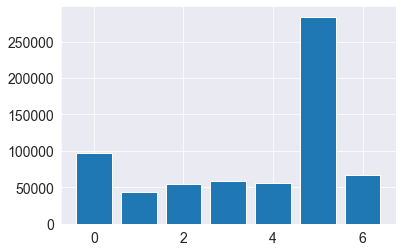

In [78]:
plt.bar(range(7), comm_topic[0])

<BarContainer object of 7 artists>

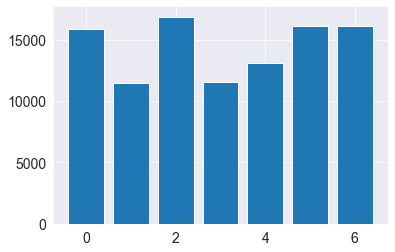

In [79]:
plt.bar(range(7), comm_topic[1])

<BarContainer object of 7 artists>

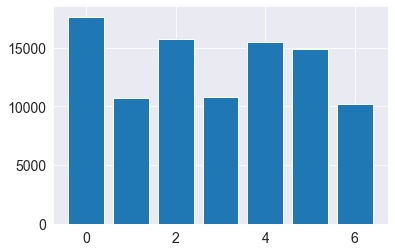

In [80]:
plt.bar(range(7), comm_topic[4])

### 28个社团的话题分布

[(22, 37882),
 (1, 27958),
 (7, 21373),
 (3, 21316),
 (10, 16738),
 (15, 16499),
 (8, 9838),
 (4, 9092),
 (2, 6696),
 (13, 5874),
 (0, 3491),

<BarContainer object of 7 artists>

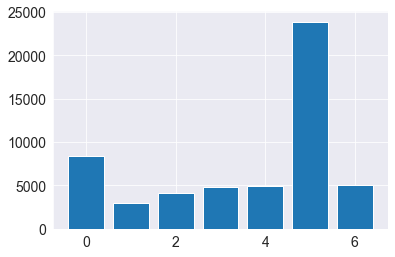

In [127]:
plt.bar(range(7), comm_topic[22])

<BarContainer object of 7 artists>

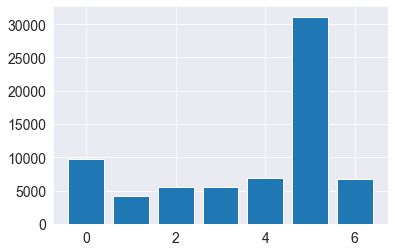

In [128]:
plt.bar(range(7), comm_topic[1])

<BarContainer object of 7 artists>

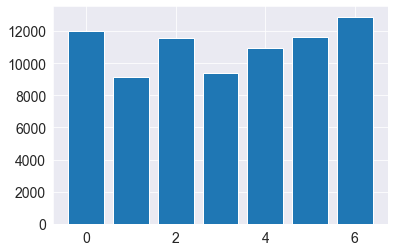

In [129]:
plt.bar(range(7), comm_topic[7])

<BarContainer object of 7 artists>

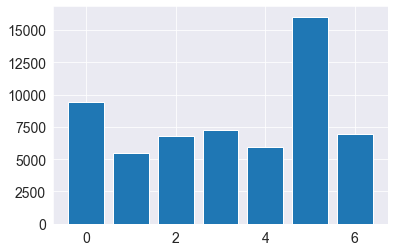

In [130]:
plt.bar(range(7), comm_topic[3])

<BarContainer object of 7 artists>

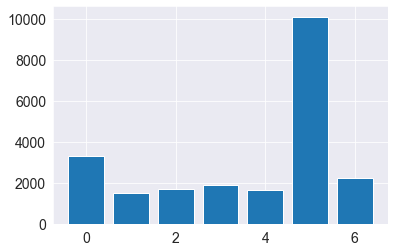

In [131]:
plt.bar(range(7), comm_topic[10])

<BarContainer object of 7 artists>

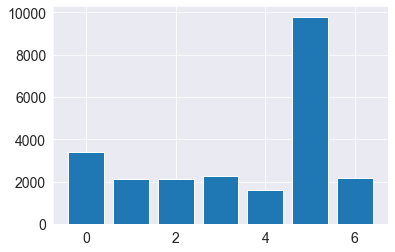

In [132]:
plt.bar(range(7), comm_topic[15])

<BarContainer object of 7 artists>

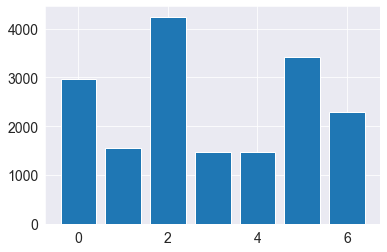

In [133]:
plt.bar(range(7), comm_topic[8])

<BarContainer object of 7 artists>

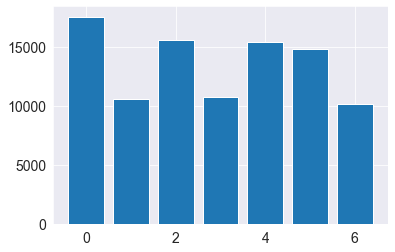

In [134]:
plt.bar(range(7), comm_topic[4])

<BarContainer object of 7 artists>

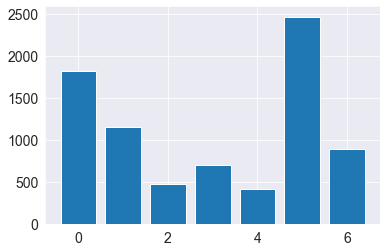

In [135]:
plt.bar(range(7), comm_topic[2])

<BarContainer object of 7 artists>

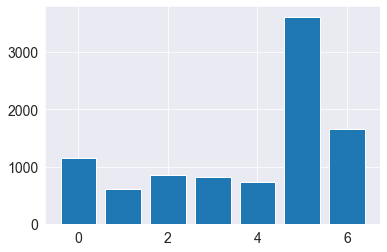

In [136]:
plt.bar(range(7), comm_topic[13])

<BarContainer object of 7 artists>

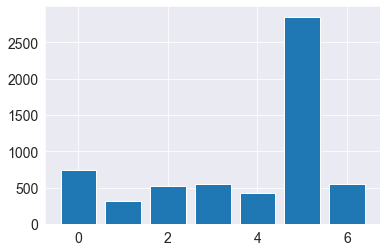

In [137]:
plt.bar(range(7), comm_topic[0])